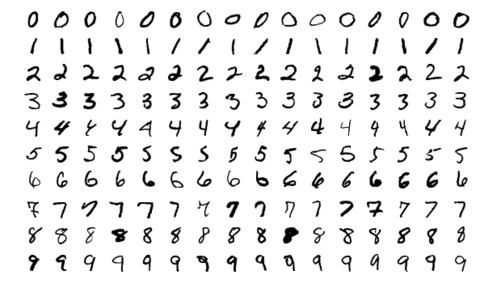

#MNIST Dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

In [6]:
X_train_full[0].shape

(28, 28)

In [7]:
y_train_full[0]

5

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

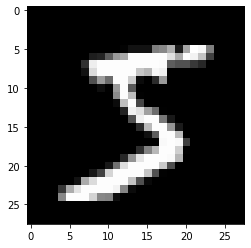

In [11]:
plt.imshow(img, cmap="gray")

In [12]:
y_train_full[0]

5

In [13]:
label = y_train_full[0]
label

5

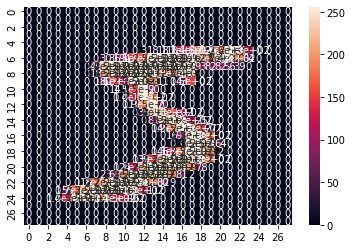

In [14]:
sns.heatmap(img, annot=True)

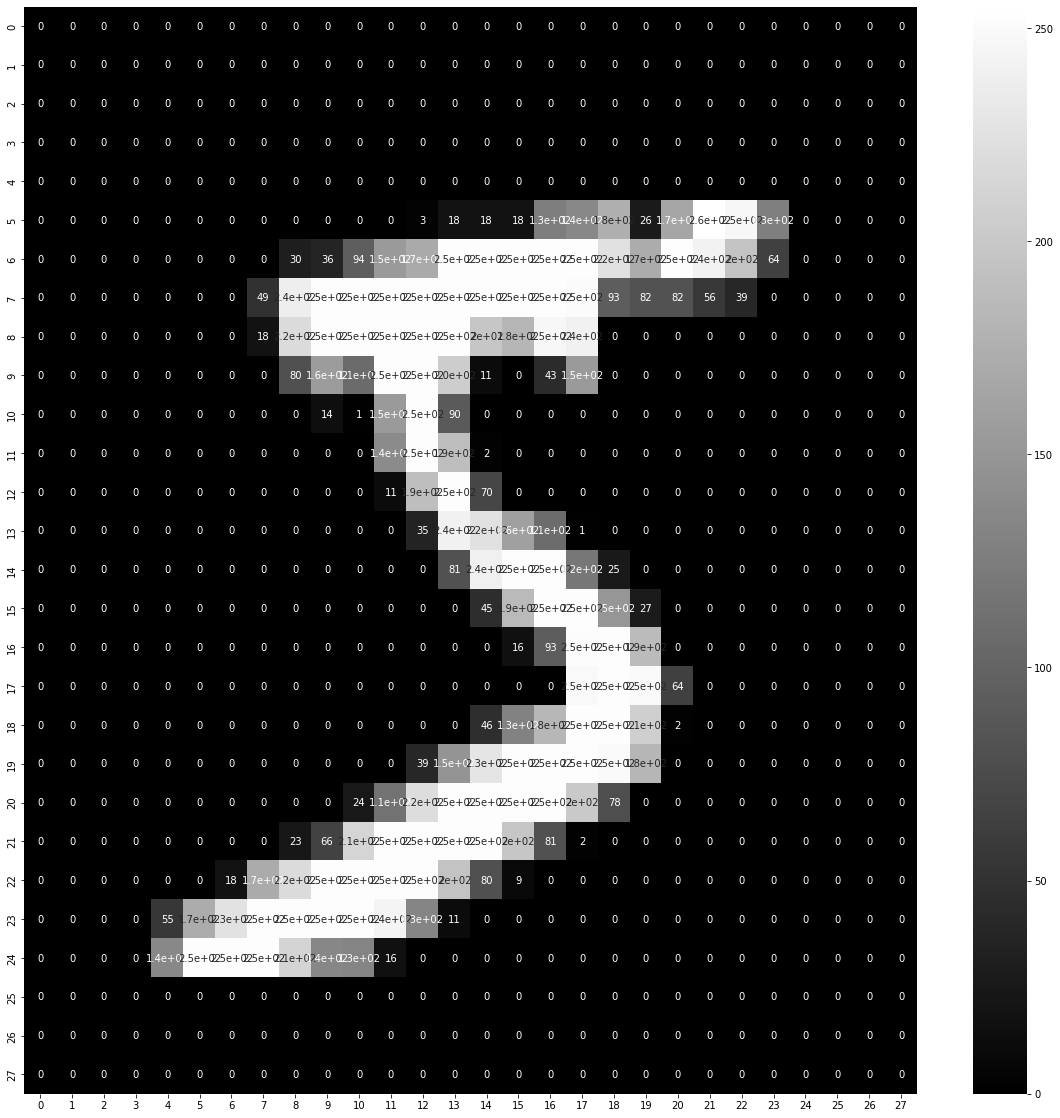

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(img, annot=True, cmap="gray")

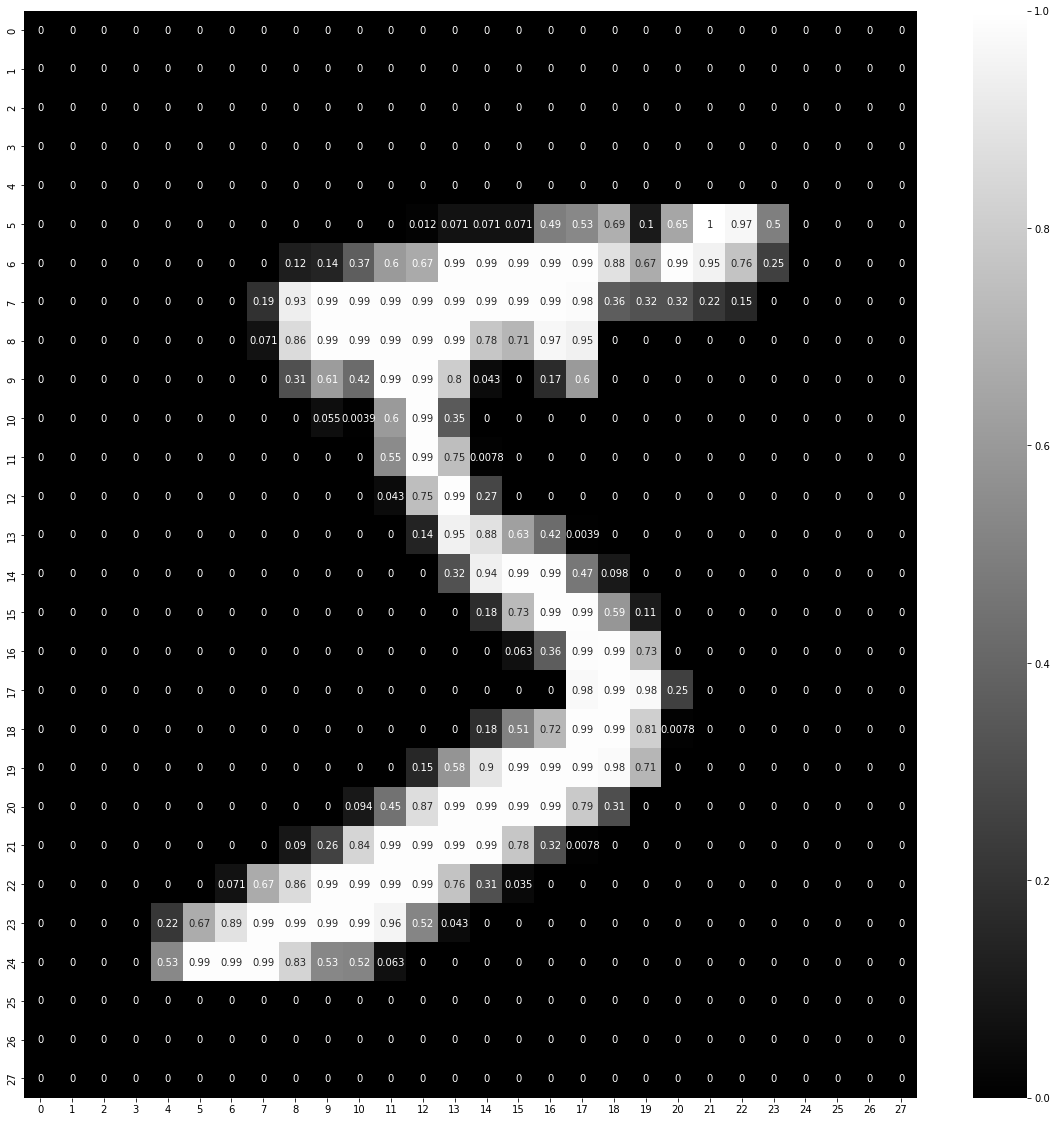

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="gray")

In [17]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255 

In [18]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

1. *0 -> 255* => More computation time, and Search space is large for finding solution

2. 0 -> 1 => Less c

In [19]:
CLASSES = len(np.unique(y_train))

In [20]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"),
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"),
]

In [21]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [22]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
784*300 + 300

235500

In [24]:
300*100 + 100

30100

In [25]:
100 * 10 + 10

1010

In [26]:
235500 + 30100 + 1010

266610

In [27]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

In [28]:
EPOCHS = 30

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    validation_data = VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.6032 - accuracy: 0.8434 - val_loss: 0.3077 - val_accuracy: 0.9106
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2878 - accuracy: 0.9173 - val_loss: 0.2390 - val_accuracy: 0.9326
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2353 - accuracy: 0.9327 - val_loss: 0.2023 - val_accuracy: 0.9442
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2005 - accuracy: 0.9424 - val_loss: 0.1787 - val_accuracy: 0.9516
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1759 - accuracy: 0.9501 - val_loss: 0.1577 - val_accuracy: 0.9574
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1559 - accuracy: 0.9553 - val_loss: 0.1474 - val_accuracy: 0.9602
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1403 - accuracy: 0.9600 - val_loss: 0.1331 - val_accuracy:

In [29]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.603217,0.843364,0.307717,0.9106
1,0.287779,0.917309,0.239028,0.9326
2,0.235268,0.932727,0.202335,0.9442
3,0.200496,0.942418,0.178676,0.9516
4,0.175876,0.950091,0.157678,0.9574
5,0.155905,0.955273,0.147370,0.9602
6,0.140317,0.960000,0.133082,0.9620
7,0.127154,0.963945,0.125539,0.9662
8,0.116088,0.967218,0.119917,0.9662
9,0.106213,0.969855,0.110117,0.9698


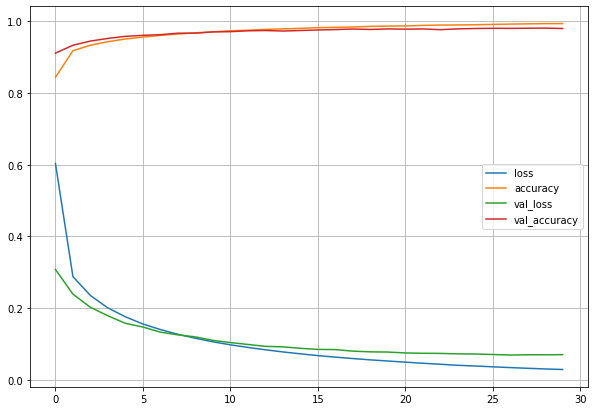

In [30]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [31]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9772


[0.07139281928539276, 0.9771999716758728]

In [32]:
model_clf.save("mnist_full.h5")

In [33]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.002,
        0.   ]], dtype=float32)

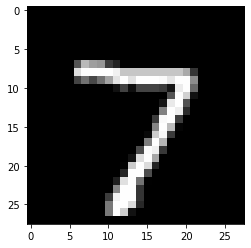

In [34]:
plt.imshow(X_new[0], cmap="gray")

In [35]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

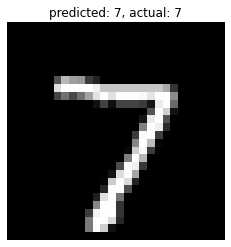

------------------------------------------------------------


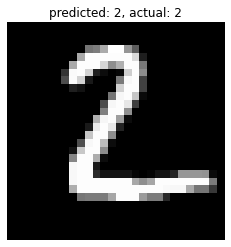

------------------------------------------------------------


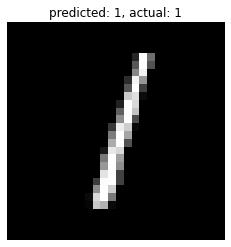

------------------------------------------------------------


In [36]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

In [37]:
X_new1 = X_test[3:6]

y_prob1 = model_clf.predict(X_new1)
y_prob1.round(3)

array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   ,
        0.001],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [38]:
Y_pred1 = np.argmax(y_prob1, axis=-1)
Y_pred1

array([0, 4, 1])

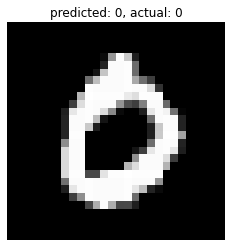

------------------------------------------------------------


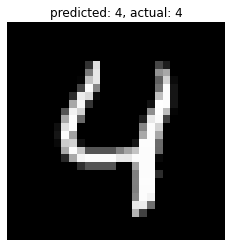

------------------------------------------------------------


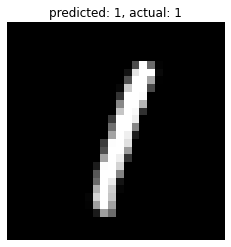

------------------------------------------------------------


In [39]:
for img_array, pred, actual in zip(X_new1, Y_pred1, y_test[3:6]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)


y_train - 

data_points | label
-|-
0|7
1|3

X_train 

data_points | data
-|-
0|(28, 28)
1|(28, 28)
2|(28, 28)
3|(28, 28)


data 

data_points | data | label
-|-| -
0|(28, 28) | 7
1|(28, 28) | 3
2|(28, 28)
3|(28, 28)


# Transfer learning

## New problem statement - 
Classify handwritten digits into odd and even

In [40]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [41]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [42]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: True
hiddenLayer01: True
hiddenLayer02: True
outputLayer: True


In [43]:
for layer in pretrained_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [44]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer01: False
hiddenLayer02: False
outputLayer: True


In [45]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [46]:
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [47]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [48]:
100*2 + 2

202

In [49]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0) # 1 -> even, 0 -> odd
    return labels

In [50]:
ex_1 = np.array([1,2,3,4,5])
ex_1

array([1, 2, 3, 4, 5])

In [51]:
for idx, label in enumerate(ex_1):
    # print(idx, label)
    print(ex_1[idx], np.where(label%2 == 0, 1, 0))

1 0
2 1
3 0
4 1
5 0


In [52]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [53]:
np.unique(y_train_bin)

array([0, 1])

In [54]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [55]:
history = new_model.fit(
    X_train, y_train_bin, epochs=10, validation_data = (X_valid, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1698 - accuracy: 0.9367 - val_loss: 0.1250 - val_accuracy: 0.9584
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1179 - accuracy: 0.9584 - val_loss: 0.1140 - val_accuracy: 0.9616
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1094 - accuracy: 0.9609 - val_loss: 0.1096 - val_accuracy: 0.9636
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1048 - accuracy: 0.9629 - val_loss: 0.1082 - val_accuracy: 0.9642
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1014 - accuracy: 0.9646 - val_loss: 0.1041 - val_accuracy: 0.9652
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0990 - accuracy: 0.9652 - val_loss: 0.1034 - val_accuracy: 0.9640
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0971 - accuracy: 0.9653 - val_loss: 0.1008 - val_accuracy:

In [56]:
new_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.1025 - accuracy: 0.9647


[0.10254478454589844, 0.9646999835968018]

In [57]:
X_new = X_test[:3]

y_prob = new_model.predict(X_new)
y_prob.round(3)

array([[0.996, 0.004],
       [0.001, 0.999],
       [0.989, 0.011]], dtype=float32)

In [58]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0])

In [59]:
y_test_bin[:3]

array([0, 1, 0])

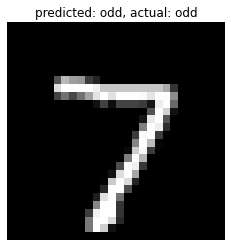

------------------------------------------------------------


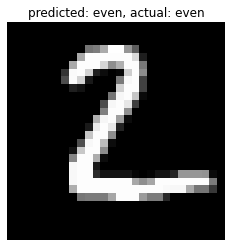

------------------------------------------------------------


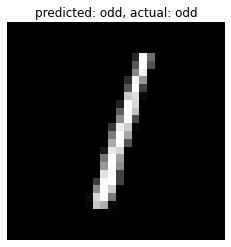

------------------------------------------------------------


In [60]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

# Train A CNN model on MNIST data

In [61]:
X_train[0].shape

(28, 28)

In [62]:
X_train.shape

(55000, 28, 28)

In [63]:
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [64]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [65]:
X_train_CNN[0].shape

(28, 28, 1)

In [66]:
input_shape = (28, 28, 1) # (row, col, channels)
CLASSES = 10
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax")
]

In [67]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [68]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [69]:
(3*3*1 + 1) * 32

320

In [70]:
(28 - 3) // 1 + 1

26

In [71]:
(26 - 2) // 2 + 1

13

In [72]:
(3*3*32 + 1) * 64

18496

# Assignment = 

1. Train this model (10 classes)
2. Try Transfer learning by changing the last layer to classify no. as even and odd (2 classes)

Mail your assignment at - 
sunny@ineuron.ai

Subject Line of this email -

**[FSDS-Nov] CNN transfer learning Assignment**

In [73]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

CNN_model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

EPOCHS = 30

VALIDATION = (X_valid, y_valid)

history = CNN_model.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    validation_data = VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 15s 4ms/step - loss: 0.6125 - accuracy: 0.8247 - val_loss: 0.2154 - val_accuracy: 0.9388
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1839 - accuracy: 0.9456 - val_loss: 0.1399 - val_accuracy: 0.9594
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1297 - accuracy: 0.9621 - val_loss: 0.1116 - val_accuracy: 0.9678
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1043 - accuracy: 0.9689 - val_loss: 0.0889 - val_accuracy: 0.9748
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0897 - accuracy: 0.9728 - val_loss: 0.0792 - val_accuracy: 0.9786
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0795 - accuracy: 0.9755 - val_loss: 0.0739 - val_accuracy: 0.9794
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0718 - accuracy: 0.9785 - val_loss: 0.0705 - val_accuracy

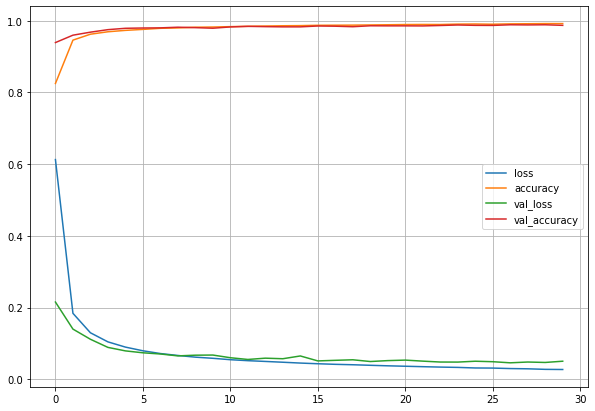

In [74]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [94]:
CNN_model.evaluate(X_test_CNN, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0406 - accuracy: 0.9870


[0.040576718747615814, 0.9869999885559082]

In [98]:
X_new = X_test_CNN[:3]

In [106]:
X_new.shape

(3, 28, 28, 1)

In [108]:
np.squeeze(X_new).shape

(3, 28, 28)

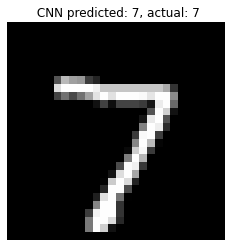

------------------------------------------------------------


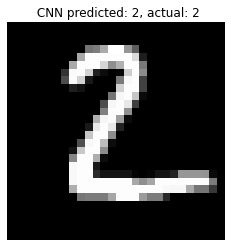

------------------------------------------------------------


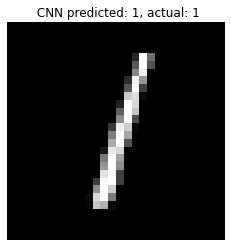

------------------------------------------------------------


In [109]:
CNN_model.save("mnist_full_CNN.h5")
X_new = X_test_CNN[:3]

y_prob_cnn = CNN_model.predict(X_new)
y_prob_cnn.round(3)
Y_pred_cnn = np.argmax(y_prob_cnn, axis=-1)
X_new_squeezed = np.squeeze(X_new)
for img_array, pred, actual in zip(X_new_squeezed, Y_pred_cnn, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f" CNN predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

## Transfer learning using CNN

In [77]:
pretrained_model_cnn = tf.keras.models.load_model("mnist_full_CNN.h5")
pretrained_model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [78]:
for layer in pretrained_model_cnn.layers:
    print(f"{layer.name}: {layer.trainable}")

conv2d: True
max_pooling2d: True
conv2d_1: True
max_pooling2d_1: True
flatten: True
dense_1: True


In [79]:
for layer in pretrained_model_cnn.layers[:-1]: # leave the last layer
    layer.trainable = False	

In [80]:
for layer in pretrained_model_cnn.layers:
    print(f"{layer.name}: {layer.trainable}")	

conv2d: False
max_pooling2d: False
conv2d_1: False
max_pooling2d_1: False
flatten: False
dense_1: True


In [82]:
lower_pretrained_model_cnn = pretrained_model_cnn.layers[:-1]

new_model_cnn = tf.keras.models.Sequential(lower_pretrained_model_cnn)
new_model_cnn.add(
    tf.keras.layers.Dense(2, activation="softmax")
)	

In [86]:
input_shape = (55000, 28, 28, 1)

In [87]:
new_model_cnn.build(input_shape)

In [88]:
new_model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_3 (Dense)             multiple                 

In [89]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0) # 1 -> even, 0 -> odd
    return labels

In [92]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [93]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

new_model_cnn.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )	
				  
history = new_model_cnn.fit(
    X_train_CNN, y_train_bin, epochs=10, validation_data = (X_valid_CNN, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1734 - accuracy: 0.9482 - val_loss: 0.0768 - val_accuracy: 0.9738
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0854 - accuracy: 0.9703 - val_loss: 0.0662 - val_accuracy: 0.9788
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0755 - accuracy: 0.9735 - val_loss: 0.0570 - val_accuracy: 0.9804
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0681 - accuracy: 0.9767 - val_loss: 0.0621 - val_accuracy: 0.9782
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0656 - accuracy: 0.9777 - val_loss: 0.0547 - val_accuracy: 0.9804
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0607 - accuracy: 0.9788 - val_loss: 0.0621 - val_accuracy: 0.9802
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0594 - accuracy: 0.9794 - val_loss: 0.0696 - val_accuracy:

In [110]:
new_model_cnn.evaluate(X_test_CNN, y_test_bin)

313/313 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.9849


[0.04502716660499573, 0.9848999977111816]

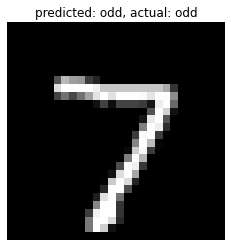

------------------------------------------------------------


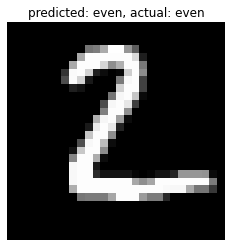

------------------------------------------------------------


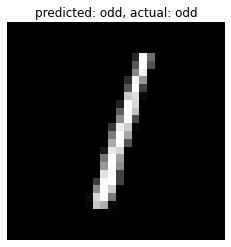

------------------------------------------------------------


In [111]:
X_new = X_test_CNN[:3]

y_prob_cnn = new_model_cnn.predict(X_new)
y_prob_cnn.round(3)	  

Y_pred_cnn = np.argmax(y_prob_cnn, axis=-1)

X_new_squeezed = np.squeeze(X_new)

for img_array, pred, actual in zip(X_new_squeezed, Y_pred_cnn, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)